Using the NOAA dataset stored here: `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. 

Following variables:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

In [2]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

#leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [3]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df.head()

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


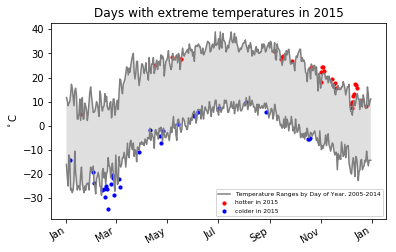

In [4]:
import datetime as dt
from datetime import datetime

station = df[df['ID']=='USW00094889']


station2015 = station[station['Date']>'2014-12-31']
station2015 = station2015[station2015['Date']<'2016-01-01']
station2015 = station2015.drop('ID',axis=1)
station2015.set_index('Date',inplace = True)
station2015.sort_index(inplace = True)
tmax2015 = station2015[station2015['Element']=='TMAX']
tmin2015 = station2015[station2015['Element']=='TMIN']
tmax2015 = tmax2015.drop('Element',axis=1)
tmin2015 = tmin2015.drop('Element',axis=1)
tmax2015 = tmax2015 / 10
tmin2015 = tmin2015 / 10
tmax2015.index = pd.to_datetime(tmax2015.index)
tmin2015.index = pd.to_datetime(tmin2015.index)
tmax2015 = tmax2015.resample('D').mean()
tmin2015 = tmin2015.resample('D').mean()

station = station[station['Date']<'2015-01-01']
station = station.drop('ID',axis=1)
station.set_index('Date',inplace = True)

#station.index = pd.to_datetime(station.index)
station.sort_index(inplace = True)
date_list = [datetime(2008, 2, 29),
             datetime(2012, 2, 29)]
station = station.drop(date_list)
tmax = station[station['Element']=='TMAX']
tmin = station[station['Element']=='TMIN']
tmax = tmax.drop('Element',axis=1)
tmin = tmin.drop('Element',axis=1)
tmax_days = tmax.groupby(lambda x: (pd.to_datetime(x).month,pd.to_datetime(x).day)).max()
tmin_days = tmin.groupby(lambda x: (pd.to_datetime(x).month,pd.to_datetime(x).day)).min()
tmax_days = tmax_days.drop((2,29))
tmin_days = tmin_days.drop((2,29))
tmax_days = tmax_days / 10
tmin_days = tmin_days / 10

import numpy as np
tmax_days.index = pd.date_range('1/1/2015', periods=365, freq='D')
tmin_days.index = pd.date_range('1/1/2015', periods=365, freq='D')
tmax_days.index.name = 'Date'
tmin_days.index.name = 'Date'
tmax_days[-5:]

plt.clf()
fig = plt.figure()
from time import strftime
ax = fig.add_subplot(111)
ax.plot(tmin_days.index, tmin_days['Data_Value'], 'tab:grey', label = 'Temperature Ranges by Day of Year, 2005-2014')
ax.plot(tmax_days.index, tmax_days['Data_Value'], 'tab:grey', label = '_nolegend_')

import matplotlib.dates as mdates

x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(90)

plt.gca().fill_between(tmin_days.index, 
                       tmin_days['Data_Value'], tmax_days['Data_Value'], 
                       facecolor='grey', 
                       alpha=0.25, label=None)

tmax2015['greater'] = tmax2015>tmax_days
tmin2015['lesser'] = tmin2015<tmin_days

tmax2015 = tmax2015[tmax2015['greater']]
tmax2015 = tmax2015.drop('greater',axis=1)
tmin2015 = tmin2015[tmin2015['lesser']]
tmin2015 = tmin2015.drop('lesser',axis=1)

plt.scatter(tmax2015.index, tmax2015['Data_Value'],s=10, c='red',label='hotter in 2015')
plt.scatter(tmin2015.index, tmin2015['Data_Value'],s=10, c='blue',label='colder in 2015')
plt.legend()


plt.ylabel('$^\circ$C')
plt.title('Days with extreme temperatures in 2015')




ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))


fig.autofmt_xdate()

plt.legend(prop={'size': 6})
plt.show()


In [7]:
fig.savefig('extreme temperatures in 2015.png')